In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def density_water(T):
    '''Density (rho) of water in kg/m^3 based on fluid temperature (T) nearest the flow meter in degrees Celsius'''
    rho = (999.85+5.332*(10**-2)*T-7.564*(10**-3)*(T**2)+4.323*(10**-5)*(T**3)-1.673*(10**-7)*(T**4)+2.447*(10**-10)*(T**5))
    return(rho)

def specific_heat_water(T):
    '''Specific heat (cp) of water in J/(kg K) based on mean fluid temperature (T) in degrees Celsius'''
    cp = (4.2184-2.8218*(10**-3)*T+7.3478*(10**-5)*(T**2)-9.4712*(10**-7)*(T**3)+7.2869*(10**-9)*(T**4)-2.8098*(10**-11)*(T**5)
          +4.4008*(10**-14)*(T**6))*1000
    return(cp)

def energy_momentum(Tk, Vk, zk):
    ''' Computes the energy momentum at a given layer of the water column '''
    return zk * Vk * density_water(Tk) * specific_heat_water(Tk)

def volume_per_layer(layer_height = 1):
    ''' Computes the volume of water in each layer of the water column '''
    a = 90.4 # side length of top surface
    # water layer height
    volume_per_layer = []
    for _ in range(1,int(16//layer_height+1)):
        b = a - 4*layer_height # the slope is 1:2 thus giving 1 m length at each side
        layer_volume = layer_height / 3 *(a**2 + a*b + b**2)
        volume_per_layer.append(layer_volume)
        a = b
    return pd.Series(volume_per_layer).round(0)[::-1].reset_index(drop=True).values

def stratification_number(T, H = 15):
    ''' Computes the stratification number for a given water column temperature profile '''
    dt_mean = (T[1:] - T[:-1]).mean()
    dt_max = (T.max() - T.min()) / 16
    return dt_mean / dt_max




def getP(i, df):
    return df.iloc[i,1:].values
def getT(i, df):
    return df.iloc[i,2:18].values

sim = pd.read_csv('../sim_model_nonlinear.csv')
pred = pd.read_csv('../pred.csv')
predw = pd.read_csv('../predw.csv')
# sd = pd.read_csv('../p3s.csv')
data = pd.read_csv('../data.csv')

V = volume_per_layer()
Z = np.linspace(0.5, 15, 16)
P = getP(0, sim)


StP = []
StD = []
for i in range(0, 1000):
    T = getT(i, data)
    P = getP(i, pred)
    StD.append(stratification_number(T))
    StP.append(stratification_number(P))







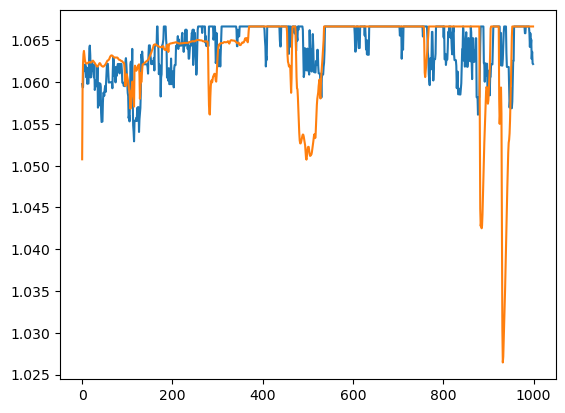

In [3]:
plt.plot(StD, label='Data')
plt.plot(StP, label='Prediction')

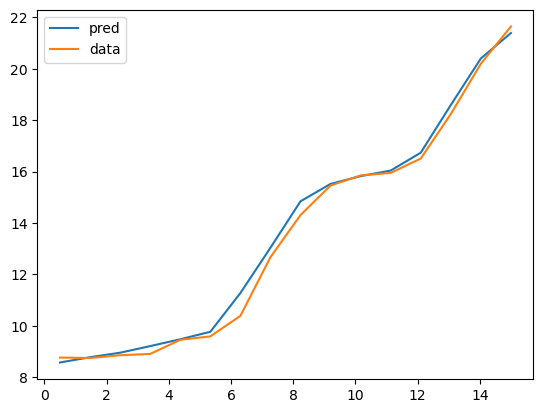

In [4]:
i = 850
s = getP(i, sim)
p = getP(i, pred)
d = getT(i, data)

# plt.plot(Z, s, label='sim')
plt.plot(Z, p, label='pred')
plt.plot(Z, d, label='data')
plt.legend()



In [5]:
# data.set_index('X', inplace=True)
data.iloc[:1000, 2:18]

X0         X1         X2         X3         X4     X5         X6  \
0    16.350000  16.300000  16.375000  16.300000  16.450000  16.45  16.416667   
1    16.350000  16.308333  16.400000  16.300000  16.408333  16.45  16.416667   
2    16.350000  16.300000  16.400000  16.300000  16.425000  16.45  16.400000   
3    16.291667  16.300000  16.400000  16.300000  16.450000  16.45  16.400000   
4    16.250000  16.300000  16.400000  16.308333  16.491667  16.45  16.400000   
..         ...        ...        ...        ...        ...    ...        ...   
995   8.900000   8.883333   9.175000   9.450000   9.616667   9.60   9.600000   
996   8.933333   8.891667   9.183333   9.450000   9.625000   9.60   9.600000   
997   8.925000   8.891667   9.200000   9.458333   9.650000   9.60   9.600000   
998   8.950000   8.900000   9.266667   9.491667   9.616667   9.60   9.591667   
999   8.950000   8.900000   9.258333   9.525000   9.650000   9.60   9.600000   

            X7         X8         X9        X10        X11        X12  \
0    16.508333  18.216667  21.150000  24.508333  31.750000  38.475000   
1    16.508333  18.158333  21.075000  24.500000  31.716667  38.458333   
2    16.508333  18.116667  21.050000  24.475000  31.658333  38.466667   
3    16.500000  18.058333  21.016667  24.450000  31.608333  38.441667   
4    16.500000  18.050000  20.991667  24.450000  31.583333  38.400000   
..         ...        ...        ...        ...        ...        ...   
995   9.650000  10.150000  12.258333  14.408333  15.625000  15.950000   
996   9.666667  10.158333  12.283333  14.450000  15.641667  15.950000   
997   9.683333  10.175000  12.308333  14.475000  15.633333  15.950000   
998   9.625000  10.233333  12.350000  14.483333  15.650000  15.958333   
999   9.733333  10.225000  12.383333  14.516667  15.650000  15.983333   

           X13        X14        X15  
0    39.500000  39.450000  39.400000  
1    39.500000  39.450000  39.391667  
2    39.500000  39.450000  39.391667  
3    39.500000  39.450000  39.400000  
4    39.500000  39.450000  39.400000  
..         ...        ...        ...  
995  16.500000  17.891667  20.175000  
996  16.500000  17.908333  20.333333  
997  16.508333  17.875000  20.641667  
998  16.541667  17.916667  20.983333  
999  16.533333  17.941667  20.766667  

[1000 rows x 16 columns]

<Axes: >

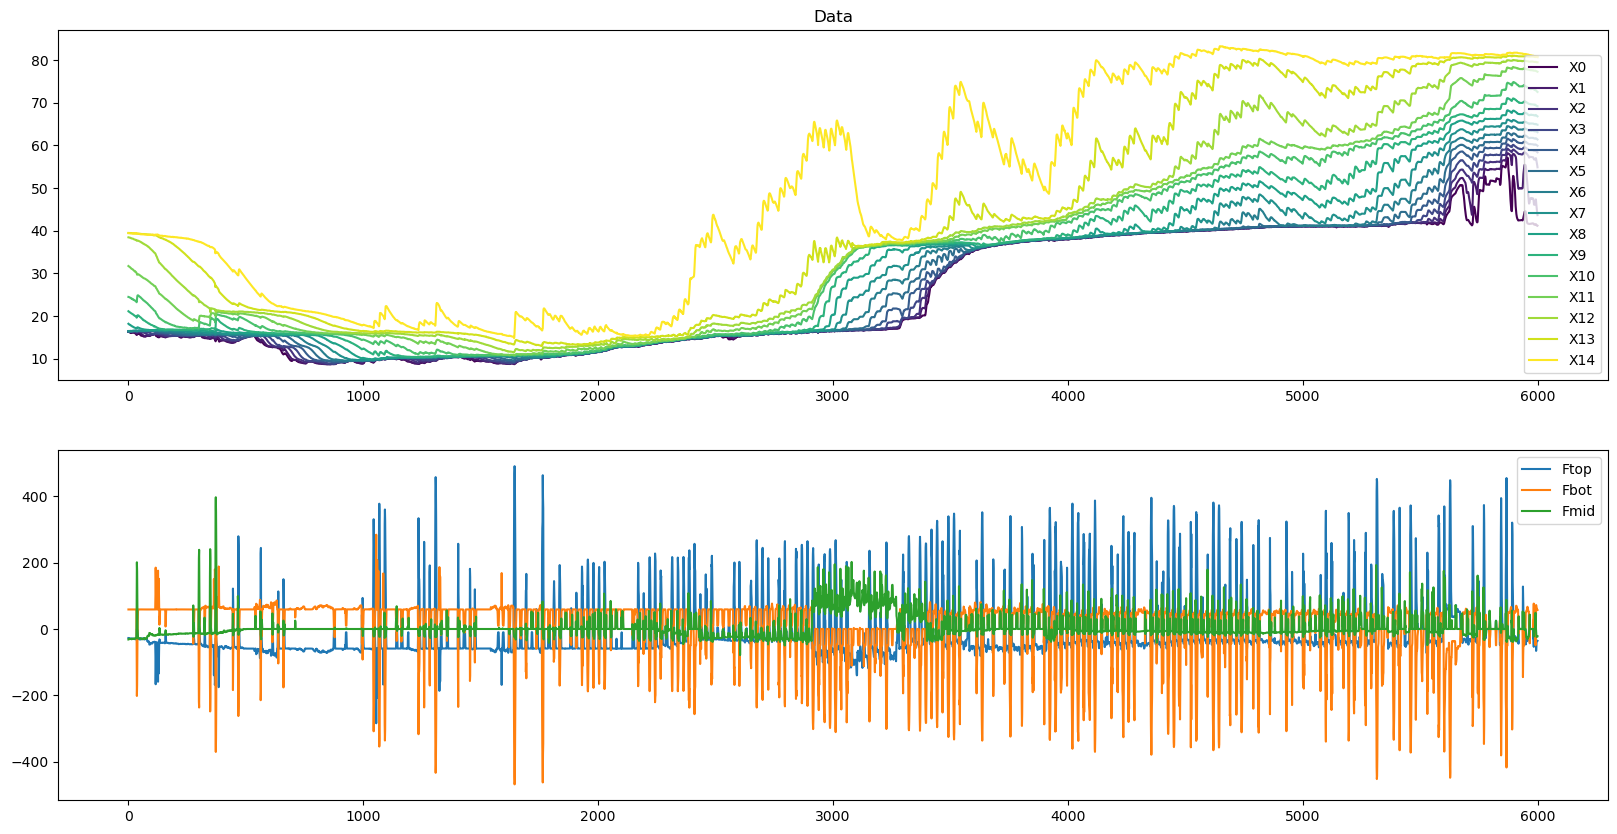

In [6]:

fig, ax = plt.subplots(2, 1, figsize=(20, 10))
data.iloc[:6000, 2:17].plot(ax = ax[0], colormap='viridis')
ax[0].set_title('Data')
ax[0].legend()
data.iloc[:6000, 19:22].plot(ax = ax[1])

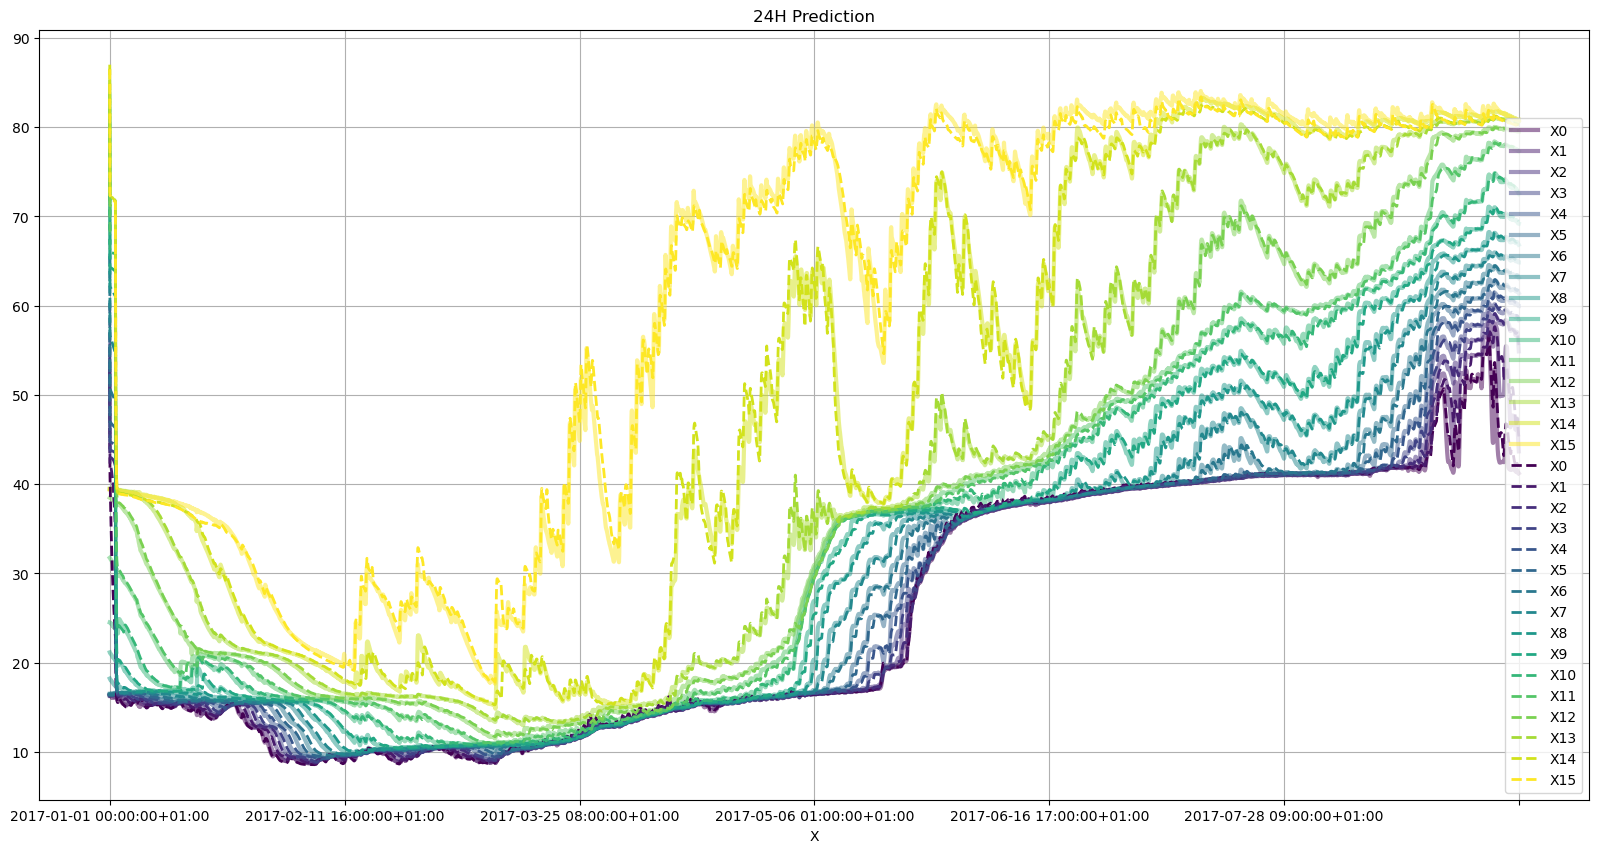

In [7]:
pred.index = data.X
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
data.iloc[:6000, 2:18].plot(ax = ax, colormap='viridis', alpha = 0.5, linewidth=3)
pred.iloc[:6000, 1:].plot(ax = ax, linestyle='--', colormap='viridis',linewidth=2)
ax.set_title('24H Prediction')
ax.grid(True)


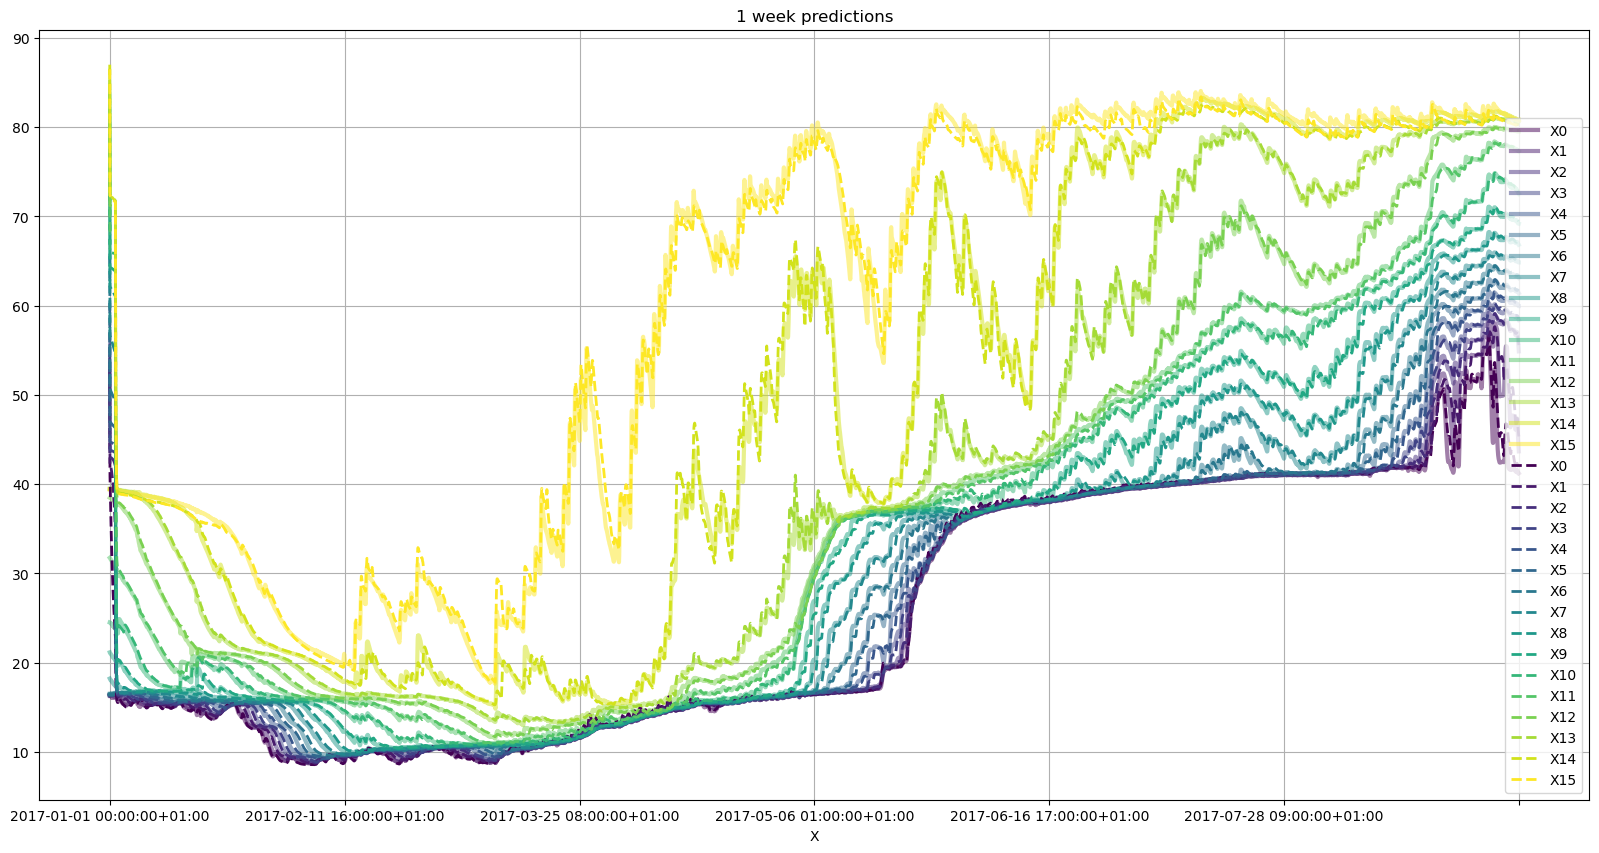

In [8]:
predw.index = data.X
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
data.iloc[:6000, 2:18].plot(ax = ax, colormap='viridis', alpha = 0.5, linewidth=3)
predw.iloc[:6000, 1:].plot(ax = ax, linestyle='--', colormap='viridis',linewidth=2)
ax.set_title('1 week predictions')
ax.grid(True)


<Axes: xlabel='X'>

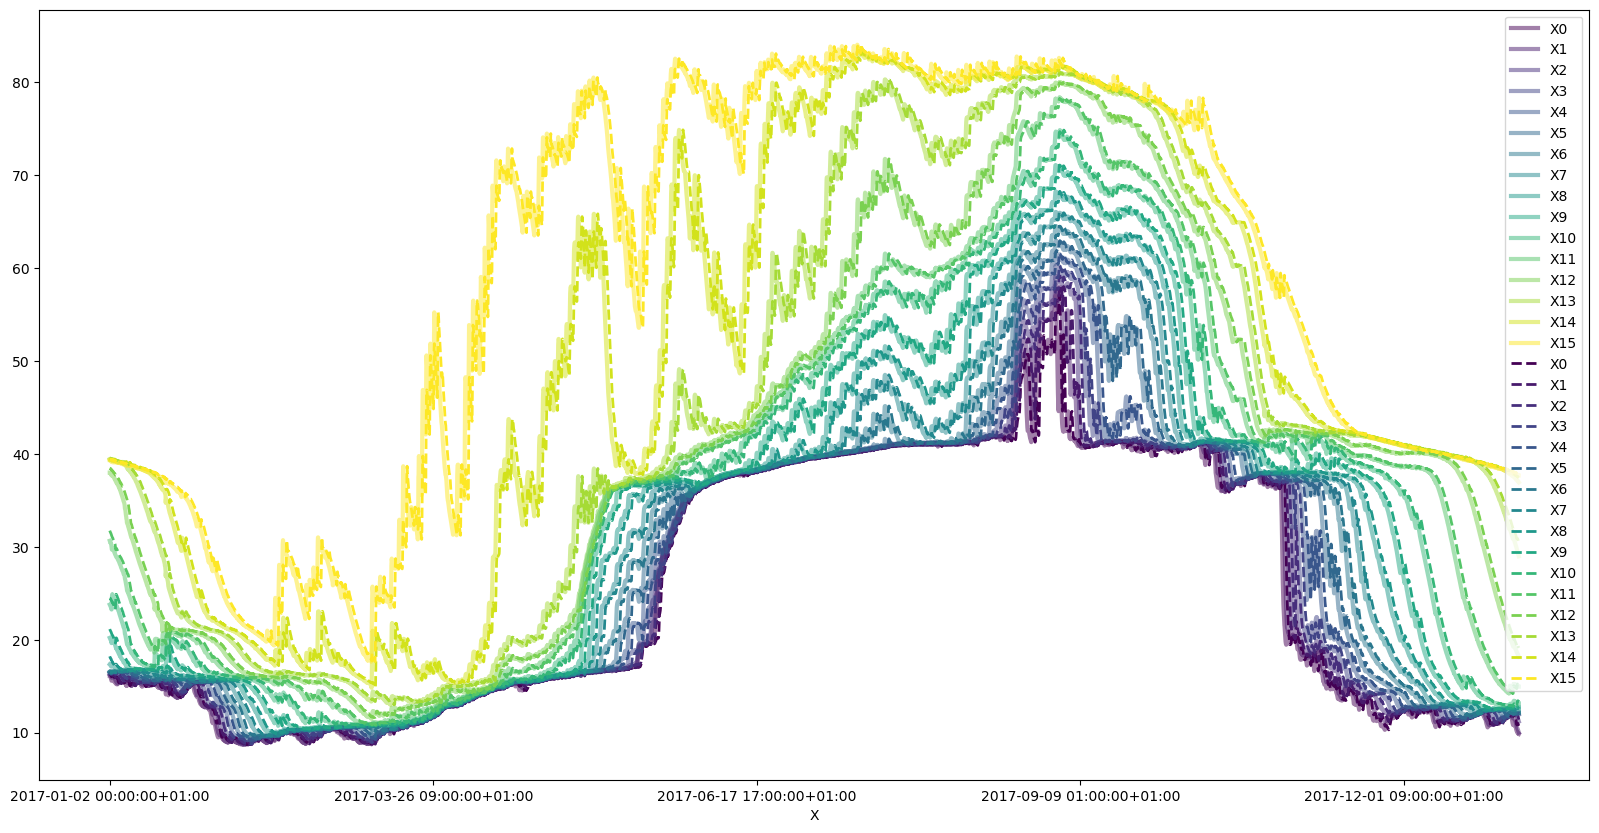

In [9]:
k = 24
p = data.iloc[:-k, 2:18]
d = data.iloc[k:,2:18]
x = data.X[d.index]
p.index = x
d.index = x


fig, ax = plt.subplots(1, 1, figsize=(20, 10))
d.plot(ax = ax, colormap='viridis', alpha = 0.5, linewidth=3)
p.plot(ax = ax, linestyle='--', colormap='viridis',linewidth=2)

In [10]:
data.iloc[:6000,2:18].index = data.X[:6000]
pred.iloc[:6000,1:].index = data.X[:6000]

In [11]:
data.index = data.X 
data

Unnamed: 0                          X         X0  \
X                                                                             
2017-01-01 00:00:00+01:00       23425  2017-01-01 00:00:00+01:00  16.350000   
2017-01-01 01:00:00+01:00       23426  2017-01-01 01:00:00+01:00  16.350000   
2017-01-01 02:00:00+01:00       23427  2017-01-01 02:00:00+01:00  16.350000   
2017-01-01 03:00:00+01:00       23428  2017-01-01 03:00:00+01:00  16.291667   
2017-01-01 04:00:00+01:00       23429  2017-01-01 04:00:00+01:00  16.250000   
...                               ...                        ...        ...   
2017-12-30 19:00:00+01:00       32156  2017-12-30 19:00:00+01:00   9.900000   
2017-12-30 20:00:00+01:00       32157  2017-12-30 20:00:00+01:00   9.908333   
2017-12-30 21:00:00+01:00       32158  2017-12-30 21:00:00+01:00   9.908333   
2017-12-30 22:00:00+01:00       32159  2017-12-30 22:00:00+01:00   9.858333   
2017-12-30 23:00:00+01:00       32160  2017-12-30 23:00:00+01:00   9.850000   

                                  X1         X2         X3         X4     X5  \
X                                                                              
2017-01-01 00:00:00+01:00  16.300000  16.375000  16.300000  16.450000  16.45   
2017-01-01 01:00:00+01:00  16.308333  16.400000  16.300000  16.408333  16.45   
2017-01-01 02:00:00+01:00  16.300000  16.400000  16.300000  16.425000  16.45   
2017-01-01 03:00:00+01:00  16.300000  16.400000  16.300000  16.450000  16.45   
2017-01-01 04:00:00+01:00  16.300000  16.400000  16.308333  16.491667  16.45   
...                              ...        ...        ...        ...    ...   
2017-12-30 19:00:00+01:00  10.208333  11.400000  12.000000  12.108333  12.10   
2017-12-30 20:00:00+01:00  10.150000  11.350000  11.975000  12.133333  12.10   
2017-12-30 21:00:00+01:00  10.091667  11.316667  11.975000  12.133333  12.10   
2017-12-30 22:00:00+01:00  10.050000  11.250000  12.000000  12.133333  12.10   
2017-12-30 23:00:00+01:00  10.008333  11.200000  11.950000  12.141667  12.10   

                                  X6         X7  ...  b7x6  b7x7  b7x8  b7x9  \
X                                                ...                           
2017-01-01 00:00:00+01:00  16.416667  16.508333  ...     0     0     0     0   
2017-01-01 01:00:00+01:00  16.416667  16.508333  ...     0     0     0     0   
2017-01-01 02:00:00+01:00  16.400000  16.508333  ...     0     0     0     0   
2017-01-01 03:00:00+01:00  16.400000  16.500000  ...     0     0     0     0   
2017-01-01 04:00:00+01:00  16.400000  16.500000  ...     0     0     0     0   
...                              ...        ...  ...   ...   ...   ...   ...   
2017-12-30 19:00:00+01:00  12.100000  12.250000  ...     0     0     0     0   
2017-12-30 20:00:00+01:00  12.100000  12.250000  ...     0     0     0     0   
2017-12-30 21:00:00+01:00  12.100000  12.250000  ...     0     0     0     0   
2017-12-30 22:00:00+01:00  12.100000  12.250000  ...     0     0     0     0   
2017-12-30 23:00:00+01:00  12.100000  12.250000  ...     0     0     0     0   

                           b7x10  b7x11  b7x12    b7x13    b7x14  b7x15  
X                                                                        
2017-01-01 00:00:00+01:00      0      0  0.008  0.10163  0.39437      1  
2017-01-01 01:00:00+01:00      0      0  0.008  0.10163  0.39437      1  
2017-01-01 02:00:00+01:00      0      0  0.008  0.10163  0.39437      1  
2017-01-01 03:00:00+01:00      0      0  0.008  0.10163  0.39437      1  
2017-01-01 04:00:00+01:00      0      0  0.008  0.10163  0.39437      1  
...                          ...    ...    ...      ...      ...    ...  
2017-12-30 19:00:00+01:00      0      0  0.008  0.10163  0.39437      1  
2017-12-30 20:00:00+01:00      0      0  0.008  0.10163  0.39437      1  
2017-12-30 21:00:00+01:00      0      0  0.008  0.10163  0.39437      1  
2017-12-30 22:00:00+01:00      0      0  0.008  0.10163  0.39437      1  
2017-12-30 23:00:00+01:00    

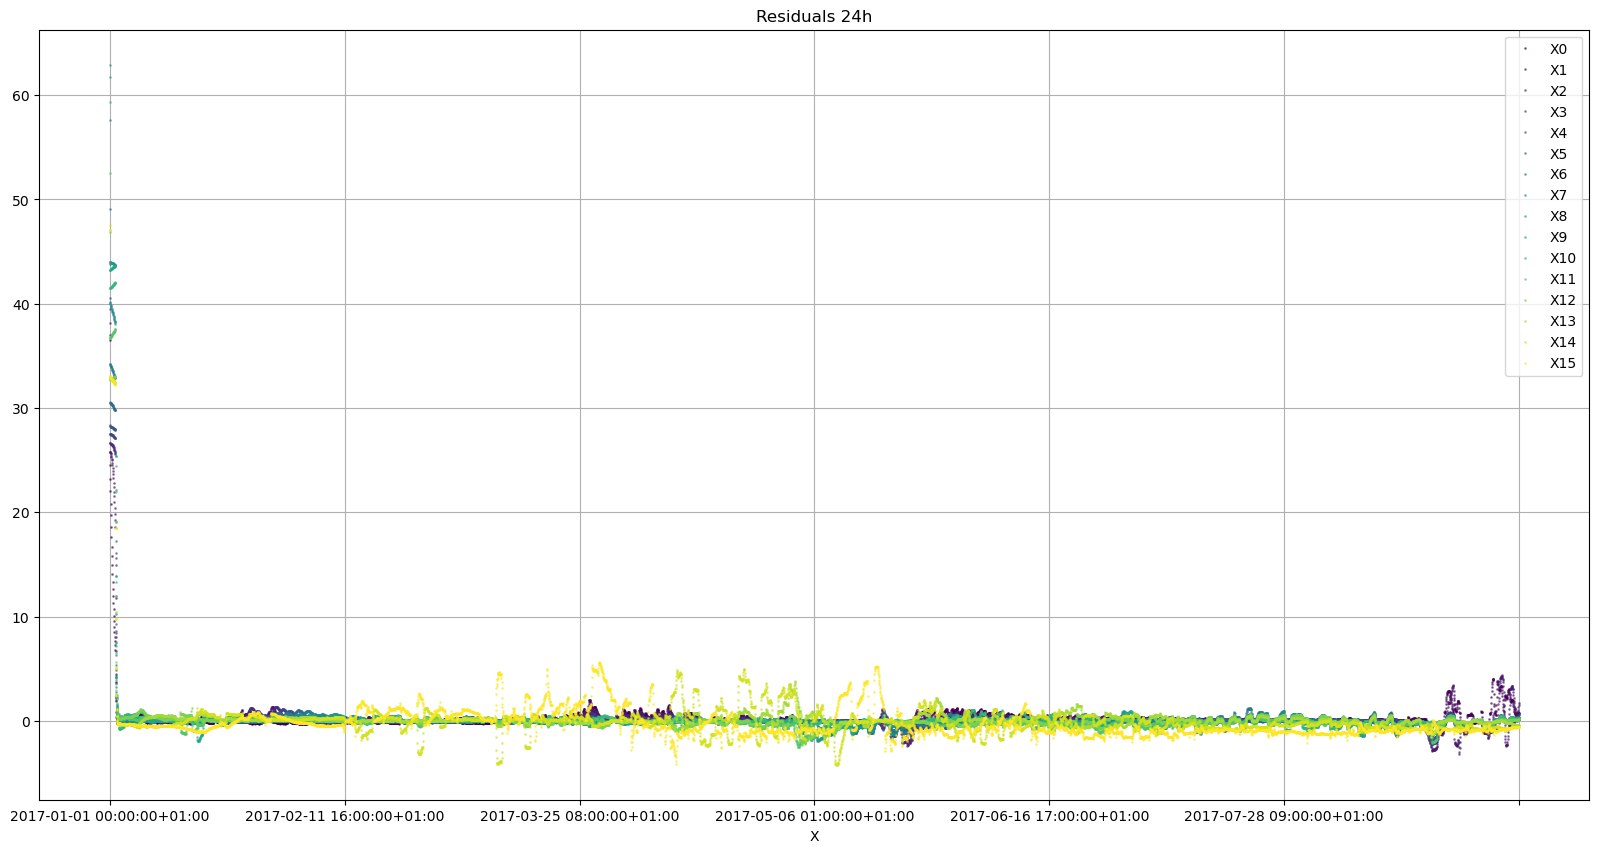

In [12]:
res = pred.iloc[:6000,1:] - data.iloc[:6000,2:18]

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
res.plot(ax = ax, colormap='viridis', alpha = 0.5, marker = 'o', linestyle='None', markersize=1)
ax.set_title('Residuals 24h')
ax.grid(True)


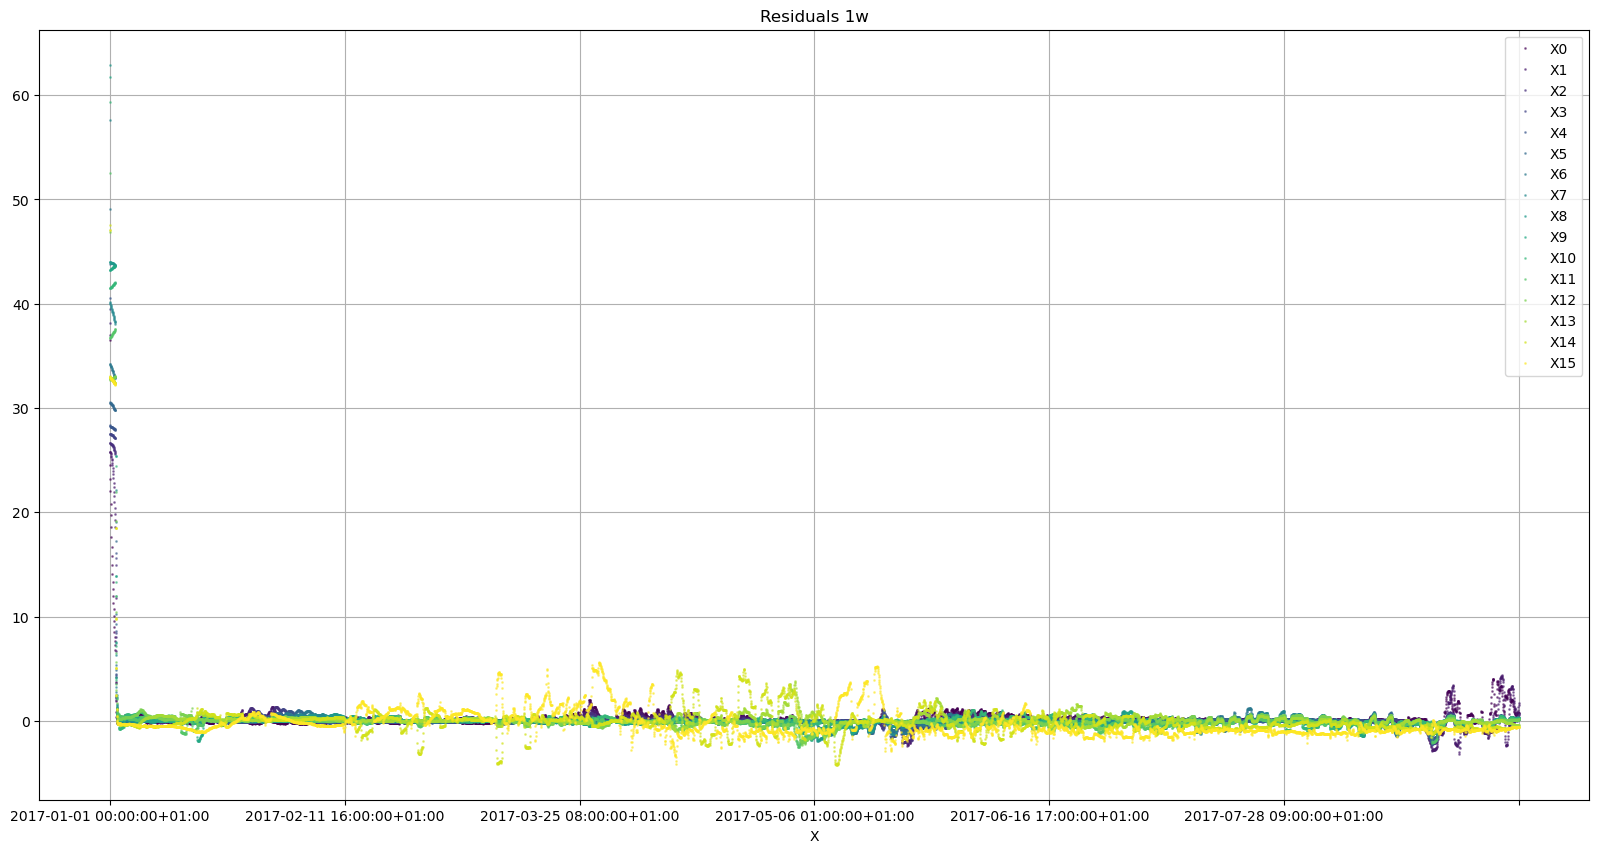

In [13]:
res = predw.iloc[:6000,1:] - data.iloc[:6000,2:18]
res.index = data.iloc[:6000].X

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
res.plot(ax = ax, colormap='viridis', alpha = 0.5, marker = 'o', linestyle='None', markersize=1)
ax.set_title('Residuals 1w')
ax.grid(True)


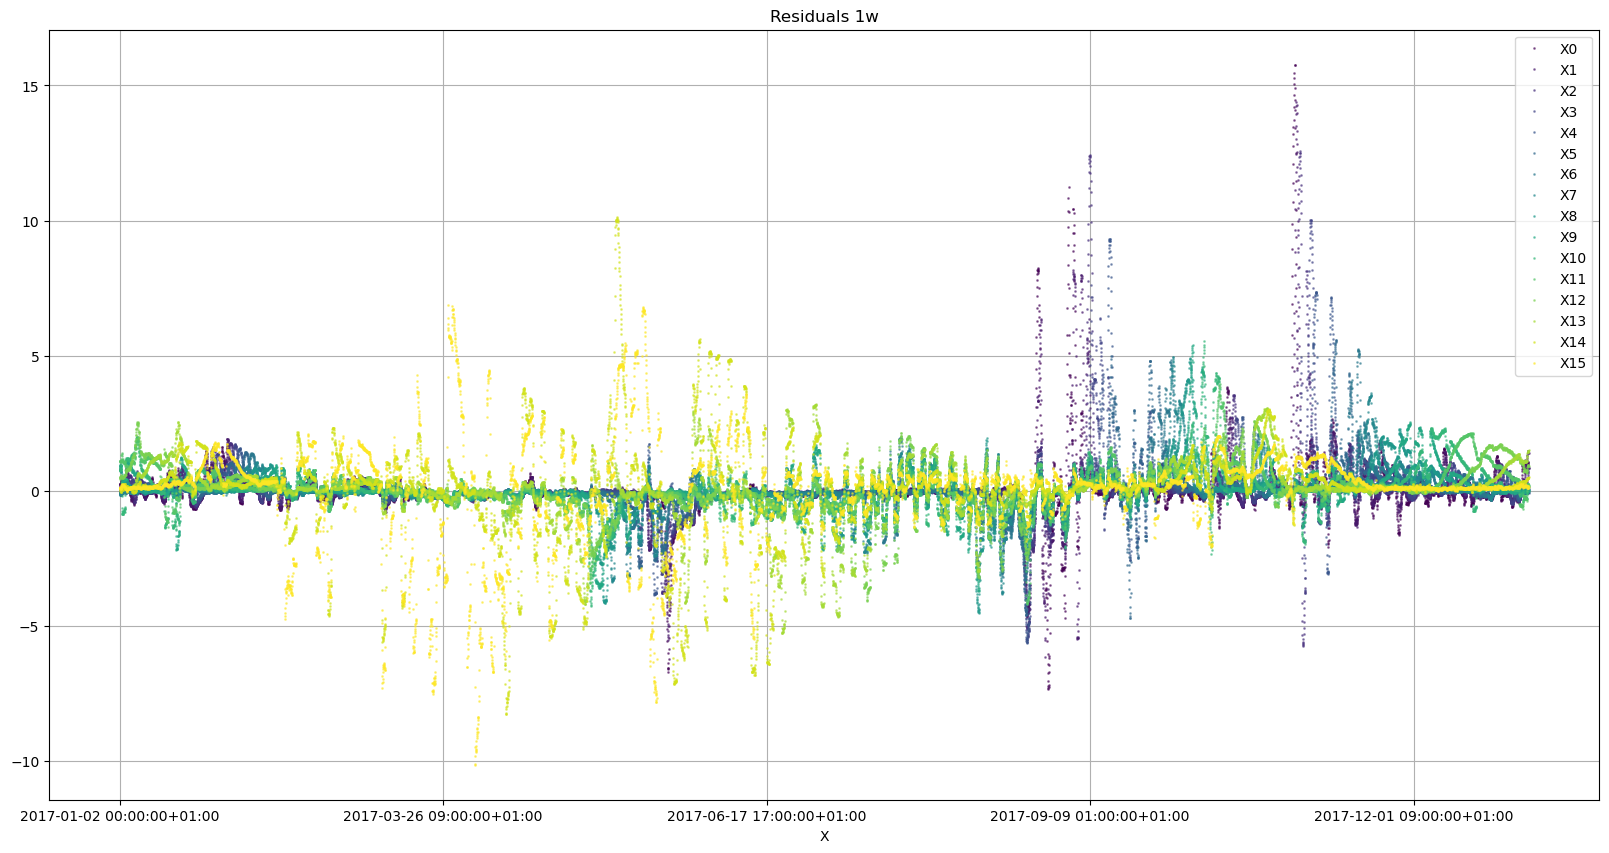

In [14]:
res = p - d
# res.index = data.iloc[:6000].X

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
res.plot(ax = ax, colormap='viridis', alpha = 0.5, marker = 'o', linestyle='None', markersize=1)
ax.set_title('Residuals 1w')
ax.grid(True)


Unnamed: 0         X0         X1         X2         X3         X4  \
0              1  16.350000  16.300000  16.375000  16.300000  16.450000   
1              2  16.380197  16.328620  16.351265  16.325009  16.441849   
2              3  16.351757  16.342387  16.344442  16.336779  16.434755   
3              4  16.305220  16.340195  16.343239  16.344400  16.428863   
4              5  16.259386  16.334603  16.342899  16.350078  16.423989   
...          ...        ...        ...        ...        ...        ...   
8730        8731   9.797566  11.632806  12.240434  12.374596  12.476363   
8731        8732   9.776904  11.603618  12.234010  12.372915  12.475386   
8732        8733   9.763009  11.574398  12.227336  12.371175  12.474399   
8733        8734   9.746324  11.545166  12.220418  12.369375  12.473402   
8734        8735   9.731892  11.515920  12.213255  12.367513  12.472395   

             X5         X6         X7         X8         X9        X10  \
0     16.450000  16.416667  16.508333  18.216667  21.150000  24.508333   
1     16.443075  16.430479  16.507852  18.202171  21.121529  24.489564   
2     16.440443  16.438990  16.507567  18.187831  21.093163  24.470434   
3     16.439158  16.444966  16.507451  18.173625  21.064864  24.450635   
4     16.438365  16.449457  16.507482  18.159548  21.036623  24.430413   
...         ...        ...        ...        ...        ...        ...   
8730  12.653109  12.981824  13.571815  15.157166  16.459958  19.028709   
8731  12.651825  12.979607  13.567472  15.147689  16.448295  19.007159   
8732  12.650543  12.977398  13.563148  15.138245  16.436661  18.985611   
8733  12.649264  12.975197  13.558846  15.128839  16.425064  18.964122   
8734  12.647987  12.973003  13.554566  15.119472  16.413502  18.942757   

            X11        X12        X13        X14        X15  
0     31.750000  38.475000  39.500000  39.450000  39.400000  
1     31.719981  38.463581  39.477462  39.443378  39.385329  
2     31.689441  38.451955  39.459136  39.430828  39.371642  
3     31.657882  38.439924  39.442341  39.416502  39.357307  
4     31.625690  38.427630  39.426215  39.401588  39.342781  
...         ...        ...        ...        ...        ...  
8730  30.000747  34.242376  34.244588  34.209591  34.147067  
8731  29.959730  34.229316  34.231879  34.197103  34.135115  
8732  29.918441  34.216263  34.219207  34.184763  34.123199  
8733  29.876984  34.203239  34.206574  34.172389  34.110844  
8734  29.835490  34.190260  34.193941  34.159914  34.098364  

[8735 rows x 17 columns]

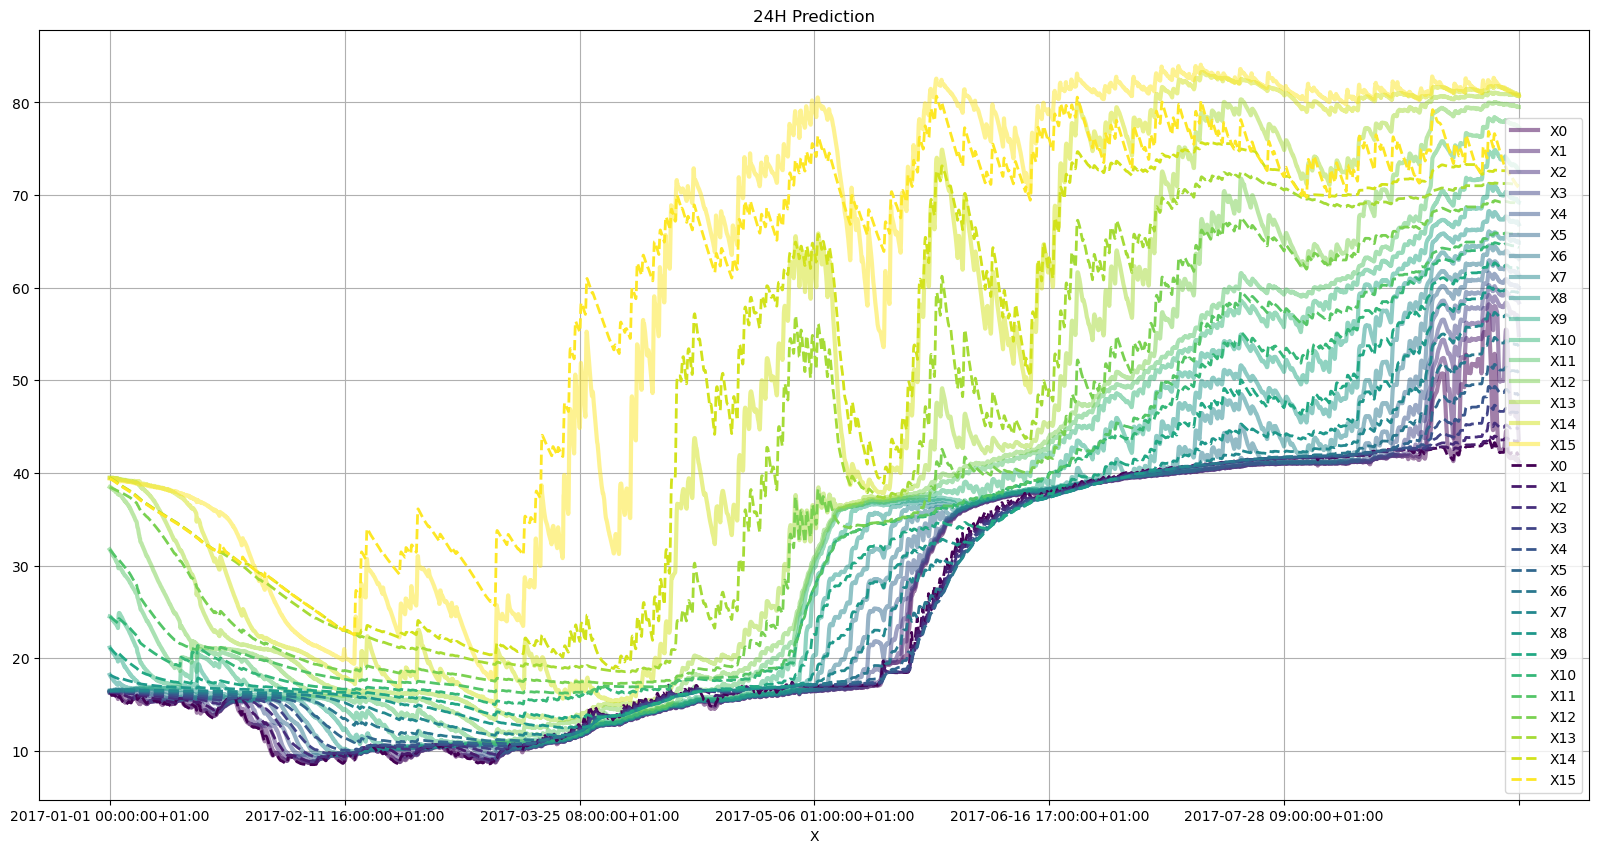

In [15]:
# sim.index = data.X

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
data.iloc[:6000, 2:18].plot(ax = ax, colormap='viridis', alpha = 0.5, linewidth=3)
sim.iloc[:6000, 1:].plot(ax = ax, linestyle='--', colormap='viridis',linewidth=2)

ax.set_title('24H Prediction')
ax.grid(True)
data
sim

In [20]:
df_water_sensors1 = data[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15']]
df_water_sensors2 = sim[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15']]
df_water_sensors3 = pred[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15']]


df_water_sensors1.reset_index(drop=True, inplace=True)
df_water_sensors2.reset_index(drop=True, inplace=True)
df_water_sensors3.reset_index(drop=True, inplace=True)


/var/folders/z9/0dn8cp0n5c5drj20sfg27q680000gn/T/ipykernel_5539/1855488308.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('winter') #  select a colormap for the plot from https://matplotlib.org/stable/tutorials/colors/colormaps.html


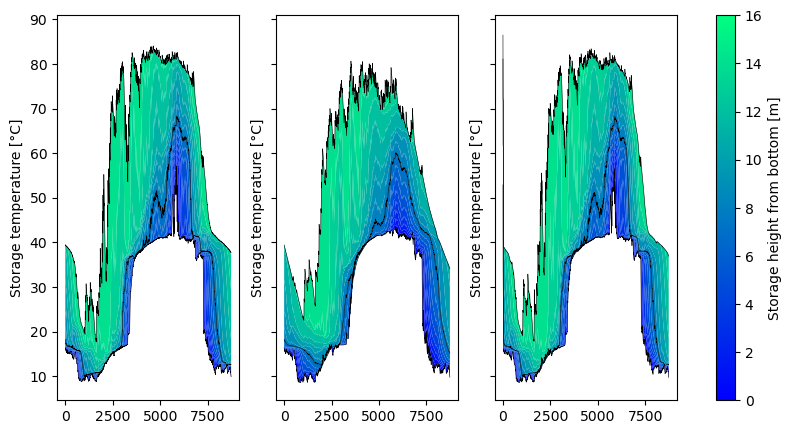

In [24]:
import matplotlib

cmap = matplotlib.cm.get_cmap('winter') #  select a colormap for the plot from https://matplotlib.org/stable/tutorials/colors/colormaps.html

 # make a copy of the dataframe to use it for the plot
water_sensors = [df_water_sensors1, df_water_sensors2, df_water_sensors3]
fig, ax = plt.subplots(1,3,figsize=(10,5),sharey=True)
for j in range(3):
    df_water_sensors = water_sensors[j].copy()
# Plot color between two temperature sensors
    for i in range(df_water_sensors.shape[1]-1):
        c1 = df_water_sensors.columns[i]
        c2 = df_water_sensors.columns[i+1]
        ax[j].fill_between(df_water_sensors.index, df_water_sensors[c2], df_water_sensors[c1],
                    where=df_water_sensors[c2] >= df_water_sensors[c1],
                    facecolor=cmap(i/len(df_water_sensors.columns))
                    )
                    


    ax[j].plot(df_water_sensors[df_water_sensors.columns[0]], c='k', lw=0.4)
    ax[j].plot(df_water_sensors[df_water_sensors.columns[int(df_water_sensors.shape[1]/2)]], c='k', lw=0.4)
    ax[j].plot(df_water_sensors[df_water_sensors.columns[-1]], c='k', lw=0.4)

    # Format y-label and set y-limit
    ax[j].set_ylabel('Storage temperature [°C]')

cax, _ = matplotlib.colorbar.make_axes(ax) 
cb2 = matplotlib.colorbar.ColorbarBase(
    cax, cmap=cmap, norm=plt.Normalize(0,16),
    
    label='Storage height from bottom [m]')
